<center><img src="https://matplotlib.org/_static/logo2.png" width=600 alt="Matplotlib Logo"></img></center>

# LAB EXERCISE: Plot temperature data from the NYS Mesonet

---
## Overview
You will replicate the workflow in a portion of the 01_MatplotlibIntro notebook, but use recent NYSM temperature data.

1. Create a basic line plot.
1. Add labels and grid lines to the plot.
1. Plot multiple time series of data.

---

## Imports

Let's import the matplotlib library's `pyplot` interface; this interface is the simplest way to create new Matplotlib figures. To shorten this long name, we import it as `plt` to keep things short but clear. We also import the `pandas` library, using its standard alias of `pd`. Finally, we import the `datetime` library, which allows for efficient operations on time-based variables and datasets.

<div class="admonition alert alert-warning">
    <p class="admonition-title" style="font-weight:bold">TASK 1:</p>
    In the code cell below, add a line that imports the  matplotlib library's `pyplot` interface with its standard alias.
</div>

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

## Read in the most recent hour's worth of NYSM observations using `pandas`.

In [15]:
# First define the format and then define the lambda function
timeFormat = "%Y-%m-%d %H:%M:%S UTC"
# This function will iterate over each string in a 1-d array
# and use Pandas' implementation of strptime to convert the string into a datetime object.
parseTime = lambda x: datetime.strptime(x, timeFormat)
df = pd.read_csv('/data1/nysm/latest.csv',parse_dates=['time'], date_parser=parseTime).set_index('time')   

In [16]:
df

,station,temp_2m [degC],temp_9m [degC],relative_humidity [percent],precip_incremental [mm],precip_local [mm],precip_max_intensity [mm/min],avg_wind_speed_prop [m/s],max_wind_speed_prop [m/s],wind_speed_stddev_prop [m/s],...,snow_depth [cm],frozen_soil_05cm [bit],frozen_soil_25cm [bit],frozen_soil_50cm [bit],soil_temp_05cm [degC],soil_temp_25cm [degC],soil_temp_50cm [degC],soil_moisture_05cm [m^3/m^3],soil_moisture_25cm [m^3/m^3],soil_moisture_50cm [m^3/m^3]
time,,,,,,,,,,,,,,,,,,,,,
2023-02-20 14:50:00,ADDI,8.2,8.0,49.4,0.0,0.0,0.0,2.4,5.1,1.2,...,-1.0,0.0,0.0,0.0,2.1,2.9,3.2,0.53,0.44,0.43
2023-02-20 14:55:00,ADDI,8.4,8.2,49.1,0.0,0.0,0.0,2.9,5.3,1.0,...,-2.0,0.0,0.0,0.0,2.1,2.9,3.2,0.53,0.44,0.43
2023-02-20 15:00:00,ADDI,8.4,8.3,48.9,0.0,0.0,0.0,2.7,4.8,0.9,...,-1.0,0.0,0.0,0.0,2.1,2.9,3.2,0.53,0.44,0.43
2023-02-20 15:05:00,ADDI,8.6,8.5,48.5,0.0,0.0,0.0,3.5,6.9,1.7,...,-2.0,0.0,0.0,0.0,2.1,2.8,3.3,0.53,0.44,0.43
2023-02-20 15:10:00,ADDI,8.7,8.5,48.2,0.0,0.0,0.0,2.7,6.1,1.2,...,-2.0,0.0,0.0,0.0,2.1,2.8,3.3,0.53,0.44,0.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-20 15:30:00,YORK,5.8,5.6,64.3,0.0,0.0,0.0,4.8,7.4,1.3,...,0.0,0.0,0.0,0.0,2.9,3.1,3.7,0.25,0.27,0.32
2023-02-20 15:35:00,YORK,5.7,5.5,64.6,0.0,0.0,0.0,5.8,7.7,0.8,...,0.0,0.0,0.0,0.0,2.9,3.2,3.7,0.25,0.27,0.32
2023-02-20 15:40:00,YORK,5.6,5.4,66.0,0.0,0.0,0.0,5.8,7.7,0.9,...,0.0,0.0,0.0,0.0,2.9,3.1,3.7,0.25,0.27,0.32


## Plot some temperature data:

Instead of "hard-coding" lists of variables and hours, Pandas creates "list-like" objects, called `Series`. First, let's specify a couple of NYSM sites, and then retrieve time and temperature data from the data file.

In [23]:
site1 = 'SOUT'
site2 = 'STON'

Read in 2 meter temperature for these sites.

In [24]:
site1_t2m = df.query('station == @site1')['temp_2m [degc]']
site2_t2m = df.query('station == @site2')['temp_2m [degc]']

In [25]:
site1_t2m

time
2023-02-20 14:50:00    10.2
2023-02-20 14:55:00    10.1
2023-02-20 15:00:00    10.2
2023-02-20 15:05:00    10.0
2023-02-20 15:10:00    10.0
2023-02-20 15:15:00    10.1
2023-02-20 15:20:00     9.8
2023-02-20 15:25:00     9.9
2023-02-20 15:30:00    10.0
2023-02-20 15:35:00     9.9
2023-02-20 15:40:00     9.9
2023-02-20 15:45:00    10.3
2023-02-20 15:50:00    10.5
Name: temp_2m [degC], dtype: float64

In [43]:
times = site1_t2m.index
temps = site1_t2m

In [44]:
times

DatetimeIndex(['2023-02-20 14:50:00', '2023-02-20 14:55:00',
               '2023-02-20 15:00:00', '2023-02-20 15:05:00',
               '2023-02-20 15:10:00', '2023-02-20 15:15:00',
               '2023-02-20 15:20:00', '2023-02-20 15:25:00',
               '2023-02-20 15:30:00', '2023-02-20 15:35:00',
               '2023-02-20 15:40:00', '2023-02-20 15:45:00',
               '2023-02-20 15:50:00'],
              dtype='datetime64[ns]', name='time', freq=None)

<div class="admonition alert alert-warning">
    <p class="admonition-title" style="font-weight:bold">TASK 2:</p>
    Choose your own two NYSM sites and repeat the execution of the above four code cells.
</div>

## Line plots

Let's create a `Figure` whose dimensions, if printed out on hardcopy, would be 10 inches wide and 6 inches long (assuming a landscape orientation). We then create an `Axes`, consisting of a single subplot, on the `Figure`. After that, we call `plot`, with `hours` as the data along the x-axis (independent values) and `temps` as the data along the y-axis (the dependent values).

<div class="admonition alert alert-warning">
    <p class="admonition-title" style="font-weight:bold">TASK 3:</p>
    Insert a code cell and use Matplotlib to create a time series plot of 2m temperature versus time for the first NYSM site you chose.
</div>

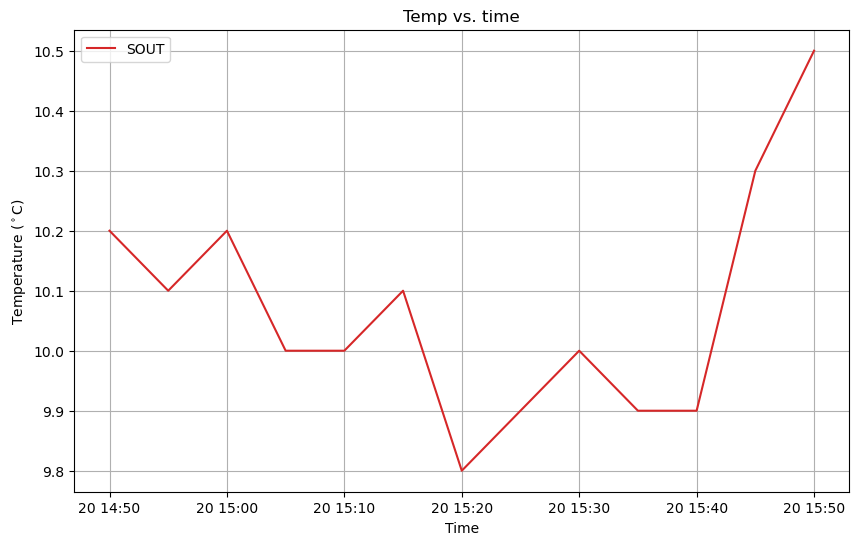

In [45]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)

ax.plot(times, temps, color='tab:red', label='SOUT')

ax.set_xlabel('Time')
ax.set_ylabel('Temperature ($^\circ$C)')
ax.set_title('Temp vs. time')

# Add the grid
ax.grid(True)

# Add a legend to the upper left corner of the plot
ax.legend(loc='upper left')

### Adding axes labels

Next, add x- and y-axis labels to our `Axes` object.

<div class="admonition alert alert-warning">
    <p class="admonition-title" style="font-weight:bold">TASK 4:</p>
    Insert a code cell and add x- and y-axis labels to your `Axes` object you just created. Also, add a meaningful title with an appropriately-readable font size.
</div>

<div class="admonition alert alert-warning">
    <p class="admonition-title" style="font-weight:bold">TASK 5:</p>
    Insert a code cell and add x- and y-axis labels to your `Axes` object you just created. Also, add a meaningful title with an appropriately-readable font size.
</div>

### Adding labels and a grid

Here we call `plot` more than once to plot multiple series of temperature on the same plot; when plotting we pass `label` to `plot` to facilitate automatic creation of legend labels. This is added with the `legend` call. We also add gridlines to the plot using the `grid()` call.

<div class="admonition alert alert-warning">
    <p class="admonition-title" style="font-weight:bold">TASK 6:</p>
    Insert a code cell and plot 2 meter temperatures for both NYSM sites on the same plot. Include a legend and gridlines.
</div>

In [47]:
times2 = site2_t2m.index
temps2 = site2_t2m

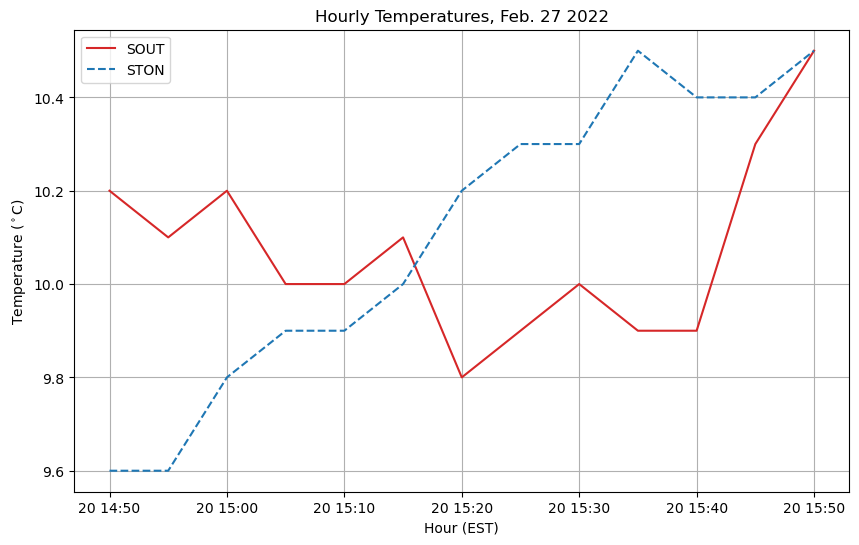

In [48]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1, 1, 1)

# Specify how our lines should look
ax.plot(times, temps, color='tab:red', label='SOUT')
ax.plot(
    times2,
    temps2,
    color='tab:blue',
    linestyle='--',
    label='STON',
)

# Set the labels and title
ax.set_xlabel('Hour (EST)')
ax.set_ylabel('Temperature ($^\circ$C)')
ax.set_title('Hourly Temperatures, Feb. 27 2022')

# Add the grid
ax.grid(True)

# Add a legend to the upper left corner of the plot
ax.legend(loc='upper left')